In [44]:
    from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dfTourneyResults = pd.read_csv('tourney_results.csv')
dfRegularSeasonResults = pd.read_csv('regular_season_results.csv')
dfSampleSubmission = pd.read_csv('sample_submission.csv')
dfSeasons = pd.read_csv('seasons.csv')
dfTeams = pd.read_csv('teams.csv')
dfTourneySeeds = pd.read_csv('tourney_seeds.csv')
dfTourneySlots = pd.read_csv('tourney_slots.csv')

Učitavanje svih datoteka te import svih potrebnih biblioteka

In [45]:
dfTourneyResults.shape
dfTourneySlots.shape
dfRegularSeasonResults.shape
dfSampleSubmission.shape
dfSeasons.shape
dfTeams.shape
dfTourneySeeds.shape

(1156, 7)

(1223, 4)

(91224, 8)

(2278, 2)

(19, 7)

(356, 2)

(1242, 3)

Za svaku od 7 tablica sam provjerio koliko ima redaka, te stupaca odnosno atributa

In [46]:
dfTeams.head()
dfSeasons.head()
dfTourneyResults.head()
dfTourneySlots.head()
dfRegularSeasonResults.head()
dfSampleSubmission.head()
dfTourneySeeds.head()

,id,name
0,501,Abilene Chr
1,502,Air Force
2,503,Akron
3,504,Alabama
4,505,Alabama A&M


,season,years,dayzero,regionW,regionX,regionY,regionZ
0,A,1995-1996,10/30/1995,East,Midwest,Southeast,West
1,B,1996-1997,10/28/1996,East,Southeast,Midwest,West
2,C,1997-1998,10/27/1997,East,West,Midwest,South
3,D,1998-1999,10/26/1998,East,Midwest,South,West
4,E,1999-2000,11/01/1999,Midwest,West,East,South


,season,daynum,wteam,wscore,lteam,lscore,numot
0,A,136,515,86,729,80,NaN
1,A,136,559,68,555,59,NaN
2,A,136,576,75,666,63,NaN
3,A,136,581,75,577,60,NaN
4,A,136,604,81,551,74,NaN


,season,slot,strongseed,weakseed
0,A,R1W1,W01,W16
1,A,R1W2,W02,W15
2,A,R1W3,W03,W14
3,A,R1W4,W04,W13
4,A,R1W5,W05,W12


,season,daynum,wteam,wscore,lteam,lscore,wloc,numot
0,A,16,511,91,647,57,H,NaN
1,A,16,515,75,812,67,H,NaN
2,A,16,606,87,658,67,H,NaN
3,A,16,670,73,573,65,H,NaN
4,A,16,721,99,632,68,H,NaN


,id,pred
0,S_507_509,0
1,S_507_511,0
2,S_507_512,0
3,S_507_521,0
4,S_507_536,0


,season,seed,team
0,A,W01,663
1,A,W02,603
2,A,W03,796
3,A,W04,660
4,A,W05,729


Za svaku od 7 tablica sam provjerio kako izgleda head dio tablice

In [47]:
dfTeams.columns.values
dfSeasons.columns.values
dfTourneyResults.columns.values
dfTourneySlots.columns.values
dfRegularSeasonResults.columns.values
dfSampleSubmission.columns.values
dfTourneySeeds.columns.values

array(['id', 'name'], dtype=object)

array(['season', 'years', 'dayzero', 'regionW', 'regionX', 'regionY',
       'regionZ'], dtype=object)

array(['season', 'daynum', 'wteam', 'wscore', 'lteam', 'lscore', 'numot'],
      dtype=object)

array(['season', 'slot', 'strongseed', 'weakseed'], dtype=object)

array(['season', 'daynum', 'wteam', 'wscore', 'lteam', 'lscore', 'wloc',
       'numot'], dtype=object)

array(['id', 'pred'], dtype=object)

array(['season', 'seed', 'team'], dtype=object)

Prikazani su nazivi svih atributa

In [48]:
dfTeams.describe()
dfSeasons.describe()
dfTourneyResults.describe()
dfTourneySlots.describe()
dfRegularSeasonResults.describe()
dfSampleSubmission.describe()
dfTourneySeeds.describe()

,id
count,356.000000
mean,678.500000
std,102.912584
min,501.000000
25%,589.750000
50%,678.500000
75%,767.250000
max,856.000000


,season,years,dayzero,regionW,regionX,regionY,regionZ
count,19,19,19,19,19,19,19
unique,19,19,19,4,7,7,6
top,A,1995-1996,10/30/1995,East,South,Midwest,West
freq,1,1,1,15,6,9,12


,daynum,wteam,wscore,lteam,lscore,numot
count,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,585.000000
mean,139.143599,682.515571,75.549308,686.699827,63.667820,0.075214
std,4.213580,98.684397,10.941410,103.201450,10.567058,0.311565
min,134.000000,504.000000,43.000000,502.000000,29.000000,0.000000
25%,136.000000,606.000000,68.000000,603.750000,57.000000,0.000000
50%,137.000000,671.000000,75.000000,681.500000,63.000000,0.000000
75%,139.000000,783.000000,82.000000,783.000000,70.000000,0.000000
max,154.000000,853.000000,121.000000,853.000000,105.000000,2.000000


,season,slot,strongseed,weakseed
count,1223,1223,1223,1223
unique,19,74,74,74
top,S,R1W1,W01,W16
freq,67,19,19,19


,daynum,wteam,wscore,lteam,lscore,numot
count,91224.000000,91224.000000,91224.000000,91224.000000,91224.000000,51333.000000
mean,73.410133,680.981058,75.370440,677.047400,63.208860,0.072000
std,34.210997,103.099502,11.408528,102.950054,10.940295,0.313278
min,0.000000,501.000000,34.000000,501.000000,20.000000,0.000000
25%,44.000000,592.000000,68.000000,587.000000,56.000000,0.000000
50%,75.000000,678.000000,75.000000,675.000000,63.000000,0.000000
75%,103.000000,772.000000,83.000000,768.000000,70.000000,0.000000
max,133.000000,856.000000,153.000000,856.000000,140.000000,6.000000


,pred
count,2278.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


,team
count,1242.000000
mean,685.844605
std,103.133122
min,502.000000
25%,603.000000
50%,680.000000
75%,783.000000
max,853.000000


S .describe() funkcijom je prikazana deskriptivna statistika svakog data framea, iz nje je vidljivo da nema kandidata za stršeće vrijednosti

In [49]:
dfTeams.nunique()
dfSeasons.nunique()
dfTourneyResults.nunique()
dfTourneySlots.nunique()
dfRegularSeasonResults.nunique()
dfSampleSubmission.nunique()
dfTourneySeeds.nunique()

id      356
name    356
dtype: int64

season     19
years      19
dayzero    19
regionW     4
regionX     7
regionY     7
regionZ     6
dtype: int64

season     18
daynum     12
wteam     155
wscore     67
lteam     258
lscore     66
numot       3
dtype: int64

season        19
slot          74
strongseed    74
weakseed      74
dtype: int64

season     19
daynum    134
wteam     356
wscore    108
lteam     356
lscore    104
wloc        3
numot       7
dtype: int64

id      2278
pred       1
dtype: int64

season     19
seed       86
team      262
dtype: int64

Iz prvog data framea je vidljivo da je id od teama je monoton te bi ga trebalo ukloniti no potreban je za kasnije joinanje s drugim tablicama

In [50]:
dfTeams.info()
dfSeasons.info()
dfTourneyResults.info()
dfTourneySlots.info()
dfRegularSeasonResults.info()
dfSampleSubmission.info()
dfTourneySeeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      356 non-null    int64 
 1   name    356 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   season   19 non-null     object
 1   years    19 non-null     object
 2   dayzero  19 non-null     object
 3   regionW  19 non-null     object
 4   regionX  19 non-null     object
 5   regionY  19 non-null     object
 6   regionZ  19 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   season  1156 non-null   object 
 1   daynu

Prikazane su informacije o svim data frameovima

In [51]:
dfTeams.isna().sum()
dfSeasons.isna().sum()
dfTourneyResults.isna().sum()
dfTourneySlots.isna().sum()
dfRegularSeasonResults.isna().sum()
dfSampleSubmission.isna().sum()
dfTourneySeeds.isna().sum()

id      0
name    0
dtype: int64

season     0
years      0
dayzero    0
regionW    0
regionX    0
regionY    0
regionZ    0
dtype: int64

season      0
daynum      0
wteam       0
wscore      0
lteam       0
lscore      0
numot     571
dtype: int64

season        0
slot          0
strongseed    0
weakseed      0
dtype: int64

season        0
daynum        0
wteam         0
wscore        0
lteam         0
lscore        0
wloc          0
numot     39891
dtype: int64

id      0
pred    0
dtype: int64

season    0
seed      0
team      0
dtype: int64

Vidljivo je da u nedostajuće atribute spada numot(broj produzetaka) u dvije tablice koji je numerički podatak te može biti bitan u kasnijem predviđanju rezultata stoga ćemo ga postaviti na srednju vrijsdnost

In [52]:
dfRegularSeasonResults.loc[dfRegularSeasonResults.numot.isna(),'numot'] = dfRegularSeasonResults.loc[:,'numot'].mean()
dfTourneyResults.loc[dfTourneyResults.numot.isna(),'numot'] = dfTourneyResults.loc[:,'numot'].mean()
dfRegularSeasonResults.isna().sum()
dfTourneyResults.isna().sum()
dfRegularSeasonResults.head()
dfTourneyResults.head()

season    0
daynum    0
wteam     0
wscore    0
lteam     0
lscore    0
wloc      0
numot     0
dtype: int64

season    0
daynum    0
wteam     0
wscore    0
lteam     0
lscore    0
numot     0
dtype: int64

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot
0,A,16,511,91,647,57,H,0.072
1,A,16,515,75,812,67,H,0.072
2,A,16,606,87,658,67,H,0.072
3,A,16,670,73,573,65,H,0.072
4,A,16,721,99,632,68,H,0.072


,season,daynum,wteam,wscore,lteam,lscore,numot
0,A,136,515,86,729,80,0.075214
1,A,136,559,68,555,59,0.075214
2,A,136,576,75,666,63,0.075214
3,A,136,581,75,577,60,0.075214
4,A,136,604,81,551,74,0.075214


Vidljivo je da su numot vrijednosti postavljene na srednju vrijednost

In [53]:
le = preprocessing.LabelEncoder()
le.fit(dfSeasons.loc[:,'season'])

dfSeasons.loc[:,'season'] = le.transform(dfSeasons.loc[:,'season'])



categories = ['regionW', 'regionX', 'regionY', 'regionZ']
dfSeasons[categories] = dfSeasons[categories].apply(le.fit_transform)

LabelEncoder()

/var/folders/4j/1szjylzj6w92zhlstrybjdwr0000gn/T/ipykernel_55106/2944573853.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dfSeasons.loc[:,'season'] = le.transform(dfSeasons.loc[:,'season'])


In [54]:
dfSeasons.info()
dfSeasons.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   season   19 non-null     int64 
 1   years    19 non-null     object
 2   dayzero  19 non-null     object
 3   regionW  19 non-null     int64 
 4   regionX  19 non-null     int64 
 5   regionY  19 non-null     int64 
 6   regionZ  19 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 1.2+ KB


,season,years,dayzero,regionW,regionX,regionY,regionZ
0,0,1995-1996,10/30/1995,2,1,6,5
1,1,1996-1997,10/28/1996,2,5,3,5
2,2,1997-1998,10/27/1997,2,6,3,0
3,3,1998-1999,10/26/1998,2,1,5,5
4,4,1999-2000,11/01/1999,3,6,1,0


Atribut season sam labelirao te promjenio da bude numeričkog tipa radi lakšeg baratanja s podatcima, takoder sam labelirao regije iz tablice season da budu numerički tipovi.

(array([7.0000e+00, 2.7000e+01, 1.2300e+02, 3.9000e+02, 1.1030e+03,
        2.6960e+03, 5.0900e+03, 8.0630e+03, 1.1178e+04, 1.2696e+04,
        1.2937e+04, 1.1541e+04, 8.9530e+03, 6.5890e+03, 4.2570e+03,
        2.4440e+03, 1.4440e+03, 8.2200e+02, 4.1500e+02, 2.2000e+02,
        1.1100e+02, 5.6000e+01, 2.9000e+01, 1.5000e+01, 7.0000e+00,
        4.0000e+00, 3.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 34.        ,  37.96666667,  41.93333333,  45.9       ,
         49.86666667,  53.83333333,  57.8       ,  61.76666667,
         65.73333333,  69.7       ,  73.66666667,  77.63333333,
         81.6       ,  85.56666667,  89.53333333,  93.5       ,
         97.46666667, 101.43333333, 105.4       , 109.36666667,
        113.33333333, 117.3       , 121.26666667, 125.23333333,
        129.2       , 133.16666667, 137.13333333, 141.1       ,
        145.06666667, 149.03333333, 153.        ]),
 <BarContainer object of 30 artists>)

Text(0.5, 0, 'Win Score')

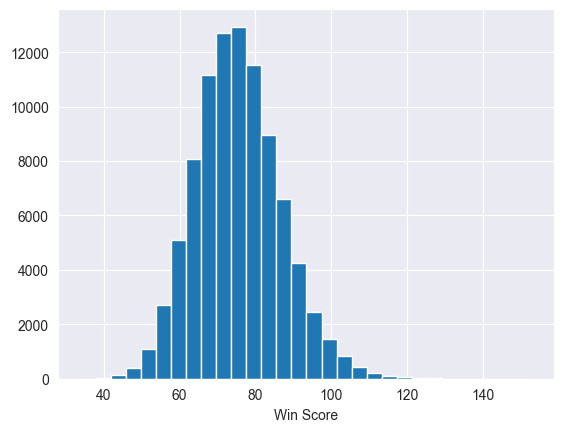

In [55]:
plt.hist(dfRegularSeasonResults.wscore, bins=30)
plt.xlabel('Win Score')
plt.show()


Za prikaz histograma odlučio sam raditi nad atributom wscore iz dataframe dfRegularSeasonResults kako bih prikazao koliko pobjednička ekipa ubacuje poena, iz grafa je vidljivo da se ta brojka najviše kreće oko 70-80

(array([7.0000e+00, 2.7000e+01, 1.2300e+02, 3.9000e+02, 1.1030e+03,
        2.6960e+03, 5.0900e+03, 8.0630e+03, 1.1178e+04, 1.2696e+04,
        1.2937e+04, 1.1541e+04, 8.9530e+03, 6.5890e+03, 4.2570e+03,
        2.4440e+03, 1.4440e+03, 8.2200e+02, 4.1500e+02, 2.2000e+02,
        1.1100e+02, 5.6000e+01, 2.9000e+01, 1.5000e+01, 7.0000e+00,
        4.0000e+00, 3.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 34.        ,  37.96666667,  41.93333333,  45.9       ,
         49.86666667,  53.83333333,  57.8       ,  61.76666667,
         65.73333333,  69.7       ,  73.66666667,  77.63333333,
         81.6       ,  85.56666667,  89.53333333,  93.5       ,
         97.46666667, 101.43333333, 105.4       , 109.36666667,
        113.33333333, 117.3       , 121.26666667, 125.23333333,
        129.2       , 133.16666667, 137.13333333, 141.1       ,
        145.06666667, 149.03333333, 153.        ]),
 <BarContainer object of 30 artists>)

(array([9.0000e+00, 1.8000e+01, 4.7000e+01, 2.0700e+02, 7.0400e+02,
        1.7070e+03, 3.5950e+03, 6.2210e+03, 9.4770e+03, 1.2202e+04,
        1.3668e+04, 1.2940e+04, 1.0831e+04, 8.0130e+03, 5.1310e+03,
        3.1100e+03, 1.6490e+03, 8.7400e+02, 4.2400e+02, 1.8800e+02,
        1.0000e+02, 5.5000e+01, 2.9000e+01, 9.0000e+00, 9.0000e+00,
        3.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 20.,  24.,  28.,  32.,  36.,  40.,  44.,  48.,  52.,  56.,  60.,
         64.,  68.,  72.,  76.,  80.,  84.,  88.,  92.,  96., 100., 104.,
        108., 112., 116., 120., 124., 128., 132., 136., 140.]),
 <BarContainer object of 30 artists>)

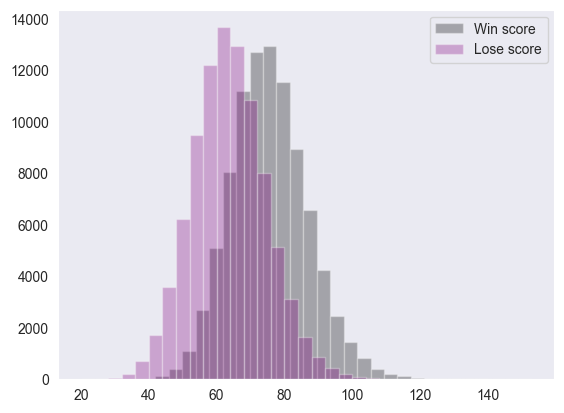

In [56]:
plt.hist(dfRegularSeasonResults.wscore, bins=30, label='Win score', color='black', alpha=0.3)
plt.hist(dfRegularSeasonResults.lscore, bins=30, label='Lose score', color='purple', alpha=0.3)
plt.legend(loc='best')
plt.grid()
plt.show()

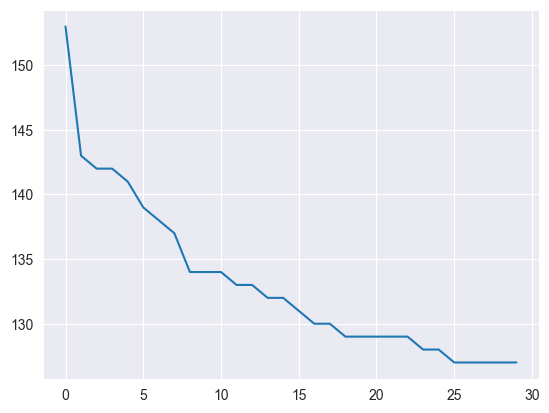

In [57]:
# show 30 youngest passengers
sorted_scores = dfRegularSeasonResults.sort_values(by=['wscore'], ascending=False).wscore.values[:30]
# teamsid = dfRegularSeasonResults.sort_values(by=['wscore'], ascending=False).wteam.values[:10]
teamsid = [x for x in range(30)]
# plot
plt.plot(teamsid, sorted_scores)
plt.show()

Graf prikazuje koliko poena je najvise zabijeno kroz sve sezone(konkretno top 30)